#Solving the Königsberg Bridge Problem with Python | Graph Theory With Python

In this tutorial, you'll see how to solve the famous Königsberg bridge problem from graph theory using pure Python. We'll write a recursive algorithm to check for eulerian circuits. Then we'l see how Euler solved the Königsberg bridge problem — which gave birth to the field of Graph Theory — and compare Euler's solution to the one we write in Python. Euler probably wouldn't like using Python to solve the problem!

#What the Königsberg Bridge Problem is ?
The Königsberg Bridge Problem is a historical mathematical puzzle involving seven bridges connecting land masses over the Pregel River in Königsberg (now Kaliningrad, Russia). It asks whether it's possible to traverse each bridge exactly once and return to the starting point. Leonhard Euler's solution in the 18th century, utilizing graph theory principles, proved that such a continuous path is impossible due to the specific configuration of bridges and land masses. This problem is significant as it laid the groundwork for the development of graph theory, a fundamental branch of mathematics.

It divides the city into 4 areas A,B,C,D

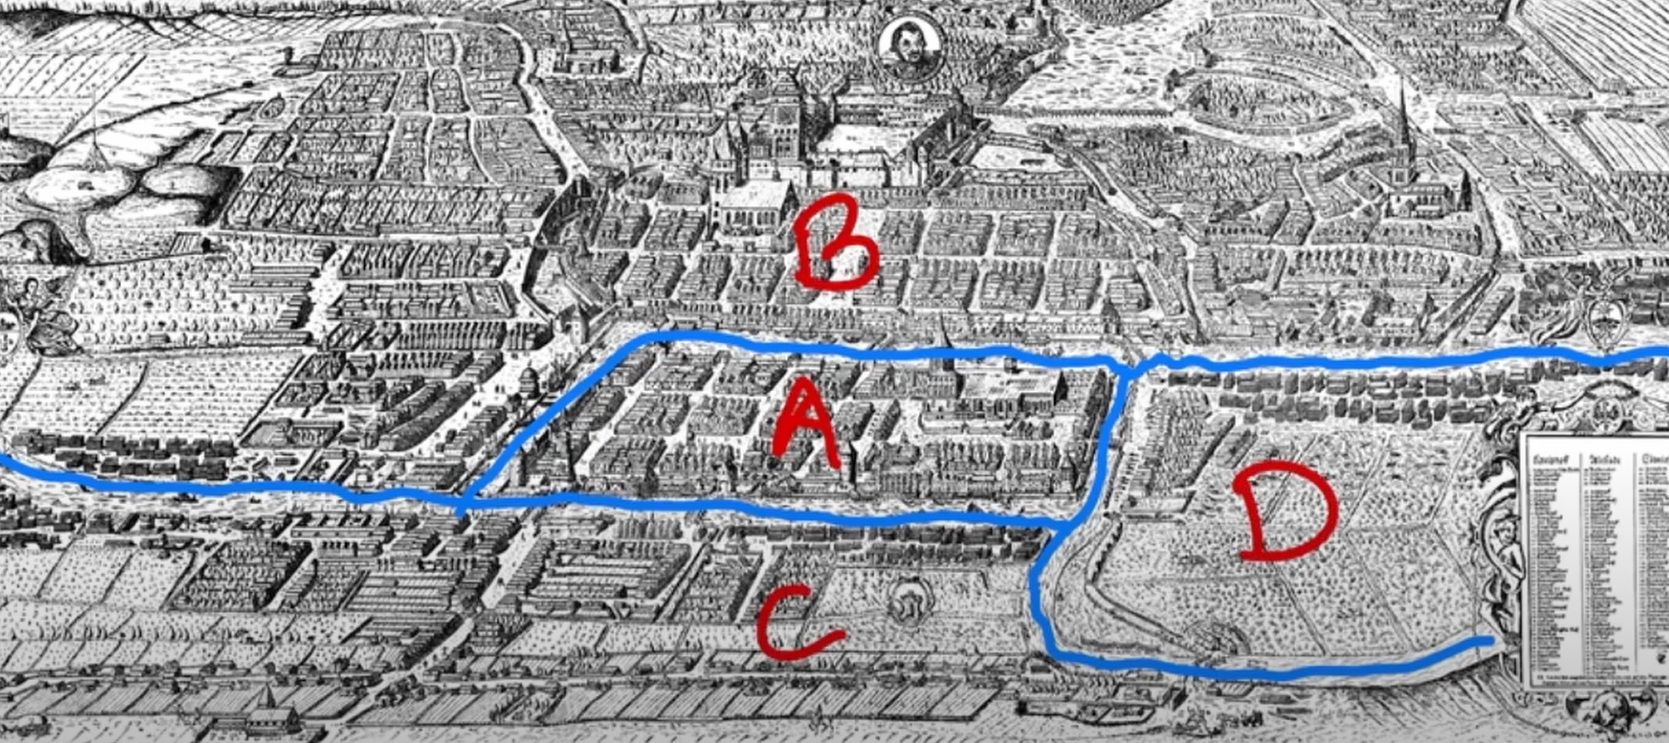

Analysis of position ( Geometry ):
The puzzle : Can you walk around the city in such a way that you cross each of the seven bridges exactly once ?
No one in the town was able to solve the puzzle.


#How we can use python to solve this problem ?

In [ ]:
# Path "CcAaBbAdCgDeA"

In [ ]:
#First we are going to define the list of bridges
BRIDGES = ["AaB","AbB","AcC","AdC","AeD","BfD","CgD"]

In [ ]:
#Buil all possible walks using this bridges
def get_walks_starting_from(area, bridges=BRIDGES):
    walks = []

    def make_walks(area, walked=None, bridges_crossed=None):
        walked = walked or area
        bridges_crossed = bridges_crossed or ()
        # Get all of the bridges connected to `area`
        # that haven't been crossed
        available_bridges = [
            bridge
            for bridge in bridges
            if area in bridge and bridge not in bridges_crossed
        ]

        # Determine if the walk has ended
        if not available_bridges:
            walks.append(walked)

        # Walk the bridge to the adjacent area and recurse
        for bridge in available_bridges:
            crossing = bridge[1:] if bridge[0] == area else bridge[1::-1]
            make_walks(
                area=crossing[-1],
                walked=walked + crossing,
                bridges_crossed=(bridge, *bridges_crossed),
            )

    make_walks(area)
    return walks

In [ ]:
walks_starting_from = {area: get_walks_starting_from(area) for area in "ABCD"}
num_total_walks = sum(len(walks) for walks in walks_starting_from.values())
print(num_total_walks)


372


In [ ]:
walks_starting_from["A"][:3]

['AaBbAcCdAeDfB', 'AaBbAcCdAeDgC', 'AaBbAcCgDeAdC']

In [ ]:
from itertools import chain
all_walks = chain.from_iterable(walks_starting_from.values())
solutions = [walk for walk in all_walks if len(walk) == 15]
print(len(solutions))

0
